<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/PyTorch/Neural_Network_Classification_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Network Classification with PyTorch

In [59]:
import torch
from torch import nn
import pandas as pd
import numpy as np

### Make classification data

In [60]:
from sklearn.datasets import make_circles

In [61]:
n_samples = 1000
X,y = make_circles(n_samples,
                   noise=0.05,random_state=42)

In [62]:
X[:5]

array([[ 0.74220688,  0.24668576],
       [-0.7340323 ,  0.16869164],
       [-0.82985872,  0.22195899],
       [-0.42913559,  0.67223019],
       [ 0.44560223, -0.89493556]])

In [63]:
y[:5]

array([1, 1, 1, 1, 0])

In [64]:
circles = pd.DataFrame({'X1':X[:,0],'X2':X[:,1],'label':y})

In [65]:
import matplotlib.pyplot as plt

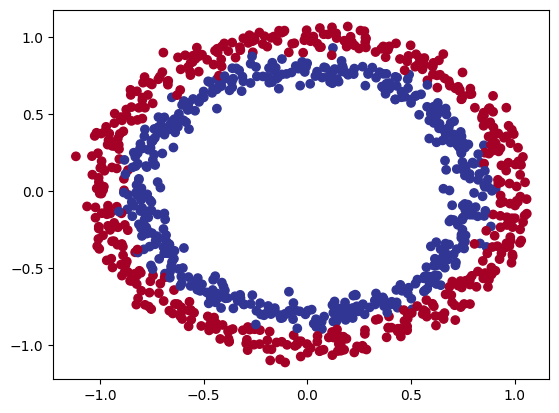

In [67]:
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [68]:
X.shape,y.shape

((1000, 2), (1000,))

In [69]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [71]:
X_train.dtype,y_train.dtype

(torch.float32, torch.float32)

In [72]:
X_train.shape

torch.Size([800, 2])

### Building a Model

In [91]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer_1 = nn.Linear(in_features = 2,out_features = 5)
    self.linear_layer_2 = nn.Linear(in_features = 5,out_features = 1)

  def forward(self,x):
    return self.linear_layer_2(self.linear_layer_1(x))

In [92]:
model_0 = CircleModelV0()

In [93]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
)

In [94]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [95]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [96]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_0.parameters(),lr=0.01)

In [97]:
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

### Training and Testing Loop

In [98]:
torch.manual_seed(42)
epochs = 100
for epoch in range(epochs):
  model_0.train()
  y_logits = model_0(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  #Calculate Loss/Accuracy
  loss = loss_fn(y_logits,y_train)
  accuracy = accuracy_fn(y_train,y_preds)

  # Optimizer zero grad
  optimizer.zero_grad()

  #Loss Backward
  loss.backward()
  # Optmizer Step
  optimizer.step()
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(test_pred,y_test)

